In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
%cd /content/drive/MyDrive/UIT/CS114/model3

/content/drive/MyDrive/UIT/CS114/model3


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df=pd.read_csv('/content/drive/MyDrive/UIT/CS114/Wecode/annonimized.csv')
df.head(5)

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [5]:
print("\n🧼 Kiểm tra dữ liệu")
df.info()


🧼 Kiểm tra dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [6]:
print(df.nunique())

concat('it001',`assignment_id`)       203
concat('it001',`problem_id`)          469
concat('it001', username)            1489
is_final                                2
status                                  4
pre_score                             631
coefficient                             4
concat('it001',`language_id`)           6
created_at                         284530
updated_at                         242976
judgement                           58406
dtype: int64


In [7]:
df = df.rename(columns={
    "concat('it001', username)": "hash",
    "concat('it001',`assignment_id`)": "assignment_id",
    "concat('it001',`problem_id`)": "problem_id",
    "pre_score": "score",
    "coefficient": "late_coef",
    "created_at": "submit_time",
    "updated_at": "judge_time",
    "concat('it001',`language_id`)": "lang_id",
    "judgement": "judgement_json"
})

In [8]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [9]:
# 1. Tìm danh sách bài tập mà không ai làm đúng
# điểm > 0 nghĩa là làm đúng
bad_exercises = df.groupby('problem_id')['score'].max()
exercises_to_remove = bad_exercises[bad_exercises == 0].index

# 2. Xóa các bài tập đó khỏi DataFrame
df = df[~df['problem_id'].isin(exercises_to_remove)].copy()


In [10]:
print(df.nunique())

assignment_id        203
problem_id           442
hash                1489
is_final               2
status                 4
score                631
late_coef              4
lang_id                6
submit_time       283493
judge_time        241936
judgement_json     58212
dtype: int64


In [11]:
df_th =  pd.read_csv('/content/drive/MyDrive/UIT/CS114/Wecode/th-public.csv')

In [12]:
df_th.head(5)

,hash,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6


In [13]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    761 non-null    object
 1   TH      755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [14]:
#chuyển TH thành dạng float
df_th['TH'] = pd.to_numeric(df_th['TH'], errors='coerce')

In [15]:
#xử lý null của cột TH
print(df_th.isna().sum())
nan_rows = df_th[df_th.isna().any(axis=1)]
print(nan_rows)

hash    0
TH      8
dtype: int64
                                         hash  TH
38   06024da8147b5cf6105beb4c403f67cf1ff0aea1 NaN
83   0d815307d5307124d148bbebfb41497230c4bd15 NaN
91   0eb93817d6eb3d5bd3e44dbc75971eea193b924f NaN
195  209d7c77e7a150b6990a3372f7cb24da0c0e7e07 NaN
210  2383a9a33025aa8759fee9a890f6420df0fc8b47 NaN
244  2855b4b4d03c37c94117e615a25e0e321ec8d77a NaN
515  59b2a9ae92876d8ce54309fe82bb92d7cffbc794 NaN
655  7186e8a3fb8c0322eee7e354ed8f1669885f6774 NaN


In [16]:
# Xóa những sinh viên có điểm TH là NaN
df_th = df_th.dropna(subset=['TH'])
# Kiểm tra còn NaN không
print(df_th.isna().sum())
df_th.info()


hash    0
TH      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hash    753 non-null    object 
 1   TH      753 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.6+ KB


In [17]:
# Chuyển cột thời gian sang kiểu datetime
# Vì dữ liệu không có năm, ta giả định năm 2024 để xử lý
df['submit_time'] = pd.to_datetime('2024-' + df['submit_time'], errors='coerce')
df['judge_time'] = pd.to_datetime('2024-' + df['judge_time'], errors='coerce')

In [18]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [19]:
df['status'].unique()

array(['SCORE', 'Compilation Error', 'pending', 'Syntax Error'],
      dtype=object)

In [20]:
custom_map = {
    'SCORE': 3,               # tốt nhất
    'pending': 2,
    'Syntax Error': 1,
    'Compilation Error': 0    # tệ nhất
}

df['status'] = df['status'].map(custom_map)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df_encoded = df.copy()
for col in ['assignment_id', 'problem_id', 'lang_id']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [23]:
df_encoded.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,116,316,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,116,199,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


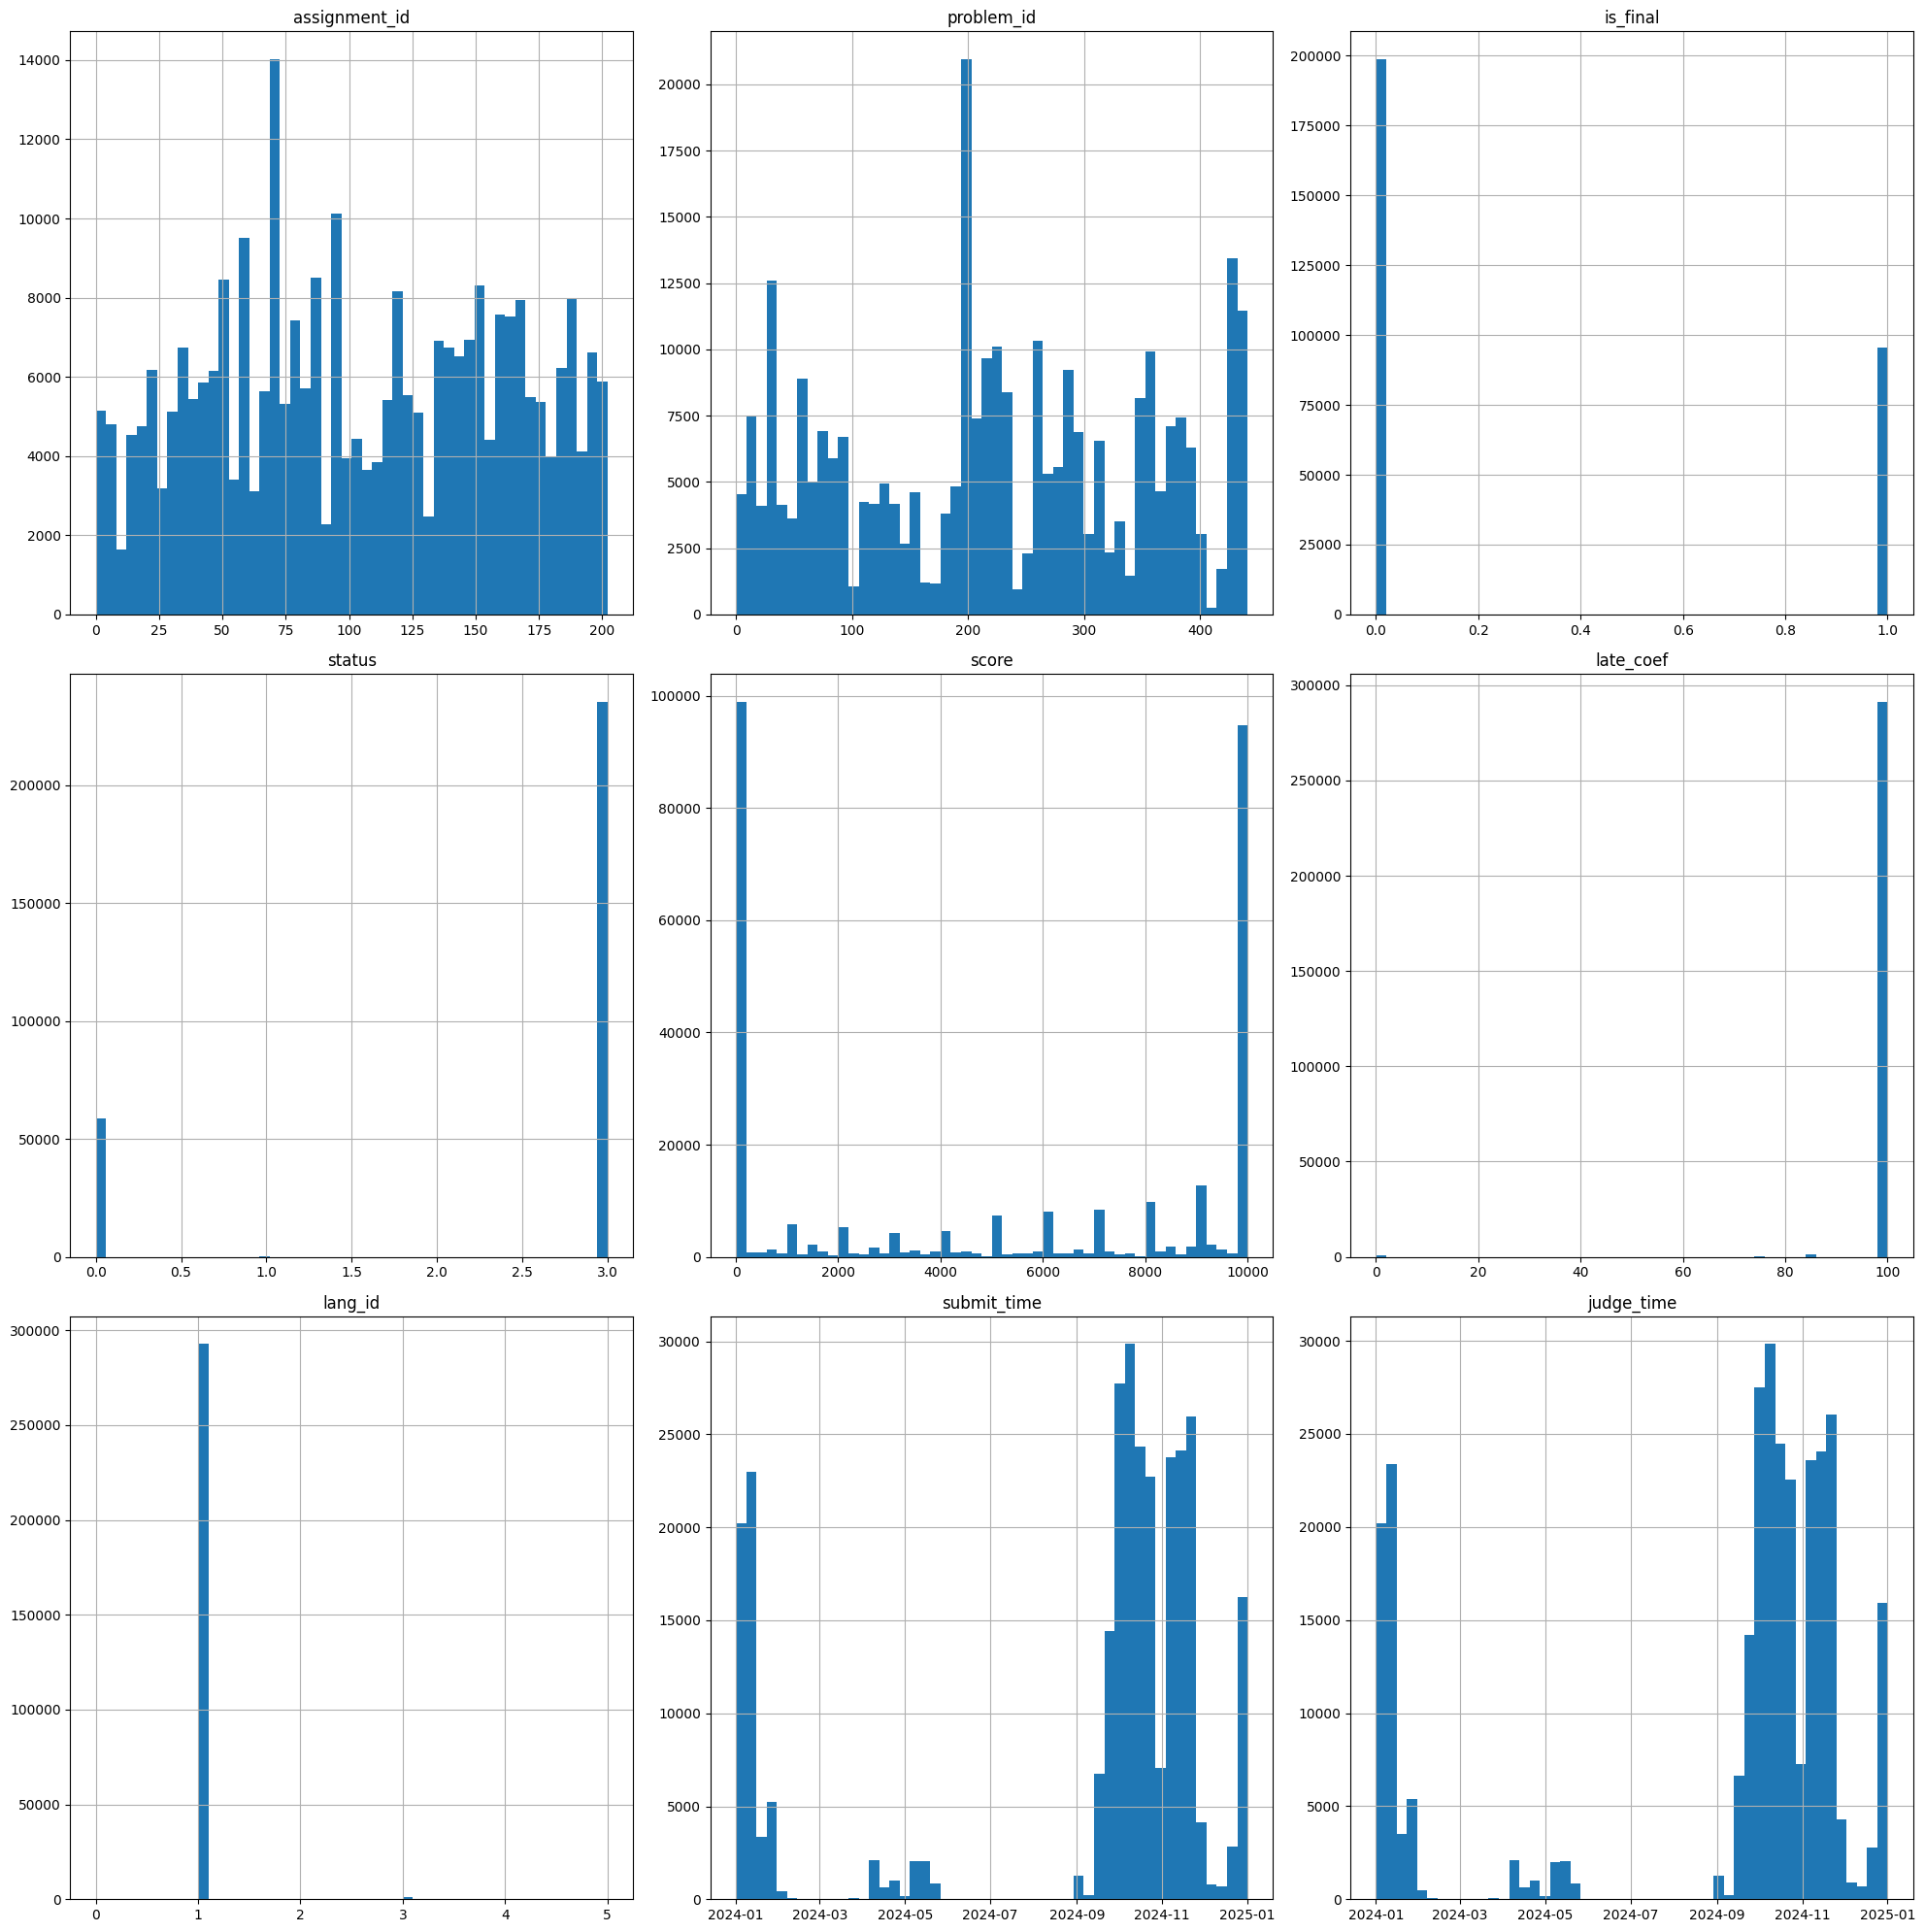

In [24]:
df_encoded.hist(figsize=(20, 20), bins=50)
plt.tight_layout()
plt.show()

In [25]:
df = df_encoded.drop(columns=['judgement_json'])

In [26]:
df.head(5)

,assignment_id,problem_id,hash,is_final,status,score,late_coef,lang_id,submit_time,judge_time
0,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:02:04,2024-10-09 08:06:58
1,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,3,0,100,1,2024-10-09 08:04:41,2024-10-09 08:04:51
2,116,195,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:06:49,2024-10-09 08:06:58
3,116,316,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 08:47:52,2024-10-09 08:48:01
4,116,199,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,3,10000,100,1,2024-10-09 09:19:35,2024-10-09 09:19:45


In [27]:
df_train = pd.DataFrame()

In [28]:
# 1. Tạo danh sách tất cả sinh viên trong df
all_hash = pd.DataFrame({'hash': df['hash'].unique()})

# 2. Gộp thông tin TH từ df_th (sẽ là NaN nếu sinh viên không nằm trong df_th)
df_train = all_hash.merge(df_th, on='hash', how='left')

# 3. Tính tổng số bài nộp từ df
submit_count = df.groupby('hash').size().rename('submit_count').reset_index()

# 4. Gộp submit_count vào df_train2
df_train = df_train.merge(submit_count, on='hash', how='left')

# 5. Điền 0 nếu chưa nộp bài
df_train['submit_count'] = df_train['submit_count'].fillna(0).astype(int)


In [29]:
df_train.info()
df_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hash          1489 non-null   object 
 1   TH            753 non-null    float64
 2   submit_count  1489 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.0+ KB


,hash,TH,submit_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172


In [30]:
# 1. Lấy các dòng is_final == 1 từ toàn bộ df
df_final = df[df['is_final'] == 1]

# 2. Tính tổng số bài is_final theo sinh viên
final_submit_count = df_final.groupby('hash').size().rename('final_submit_count').reset_index()

# 3. Gộp vào df_train (đã tạo từ all_hash.merge(df_th, how='left'))
df_train = df_train.merge(final_submit_count, on='hash', how='left')

# 4. Điền 0 nếu sinh viên chưa có bài is_final
df_train['final_submit_count'] = df_train['final_submit_count'].fillna(0).astype(int)


In [31]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83


In [32]:

# 2. Lọc những dòng có is_final == 1
df_final = df[df['is_final'] == 1]
# 3. Tính điểm trung bình của các bài is_final
avg_final_score = df_final.groupby('hash')['score'].mean().rename('avg_final_score')

# 4. Gộp vào df_train
df_train = df_train.merge(avg_final_score, on='hash', how='left')

# 5. Nếu sinh viên không có bài is_final, điền giá trị 0
df_train['avg_final_score'] = df_train['avg_final_score'].fillna(0)


In [33]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566


In [34]:
# Đếm số lượng status đã encode (giá trị từ 0 đến 3)
status_counts = df.groupby(['hash', 'status']).size().unstack(fill_value=0)

# Đặt tên cột lại cho rõ ràng
status_counts.columns = [f'count_status_{int(col)}' for col in status_counts.columns]

# Gộp vào df_train
df_train = df_train.merge(status_counts, on='hash', how='left')

# Điền 0 nếu thiếu
#df_train.fillna(0, inplace=True)

# Ép kiểu về int
df_train[status_counts.columns] = df_train[status_counts.columns].astype(int)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146


In [35]:
# 2. Đếm số lượng lang_id khác nhau theo từng sinh viên
lang_count = df.groupby('hash')['lang_id'].nunique().rename('lang_count')

# 3. Gộp vào df_train
df_train = df_train.merge(lang_count, on='hash', how='left')

# 4. Điền 0 nếu sinh viên chưa nộp bài nào (hiếm)
df_train['lang_count'] = df_train['lang_count'].fillna(0).astype(int)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1


In [36]:
# 2. Tính trung bình late_coef
avg_late_coef = df.groupby('hash')['late_coef'].mean().rename('avg_late_coef')

# 3. Gộp vào df_train
df_train = df_train.merge(avg_late_coef, on='hash', how='left')

# 4. Điền 0 nếu không có bài nào
df_train['avg_late_coef'] = df_train['avg_late_coef'].fillna(0)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0


In [37]:
# 2. Đếm số lần nộp cho mỗi bài
submit_counts = df.groupby(['hash', 'problem_id']).size().reset_index(name='submission_count')

# 3. Tính trung bình số lần nộp lại mỗi bài của mỗi sinh viên
avg_resubmit = submit_counts.groupby('hash')['submission_count'].mean().rename('avg_submission_per_problem')

# 4. Gộp vào df_train
df_train = df_train.merge(avg_resubmit, on='hash', how='left')

# 5. Điền 0 nếu sinh viên chưa nộp bài nào
df_train['avg_submission_per_problem'] = df_train['avg_submission_per_problem'].fillna(0)


In [38]:
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef,avg_submission_per_problem
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0,2.396552
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0,2.848214
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0,4.074074
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0,2.245455
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0,2.072289


In [39]:
# Lấy thời gian nộp sớm nhất và chấm muộn nhất cho từng bài
earliest = df[['hash', 'problem_id', 'submit_time']].groupby(['hash', 'problem_id'], as_index=False).min()
latest = df[['hash', 'problem_id', 'judge_time']].groupby(['hash', 'problem_id'], as_index=False).max()

# Tính chênh lệch thời gian làm bài (giây)
time_diff = earliest.merge(latest, on=['hash', 'problem_id'])
time_diff['time'] = (time_diff['judge_time'] - time_diff['submit_time']).dt.total_seconds()

# Trung bình thời gian làm bài theo từng sinh viên
average_time = time_diff.groupby('hash', as_index=False)['time'].mean()
average_time.rename(columns={'time': 'average_time'}, inplace=True)

# Gộp vào df_train
df_train = df_train.merge(average_time, on='hash', how='left')
df_train['average_time'] = df_train['average_time'].fillna(0)
df_train['average_time'] = df_train['average_time'].astype(int)
df_train.head(5)

,hash,TH,submit_count,final_submit_count,avg_final_score,count_status_0,count_status_1,count_status_2,count_status_3,lang_count,avg_late_coef,avg_submission_per_problem,average_time
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,NaN,139,58,9801.724138,34,0,0,105,1,100.0,2.396552,6418
1,ba12c0a2cb367af0467e479c03507c71a805d291,NaN,319,117,10000.000000,74,0,0,245,1,100.0,2.848214,909848
2,0bd2037bf68a97753e5e67ab55dac026a649f279,4.5,220,54,9084.166667,57,0,0,163,1,100.0,4.074074,106527
3,b7298b0fe50443a623af9b56792b330c2d052845,NaN,247,110,9911.881818,36,0,0,211,1,100.0,2.245455,603250
4,c60be70309789b39355dc612f36e37090ccad5dc,NaN,172,83,9722.891566,26,0,0,146,1,100.0,2.072289,20048


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hash                        1489 non-null   object 
 1   TH                          753 non-null    float64
 2   submit_count                1489 non-null   int64  
 3   final_submit_count          1489 non-null   int64  
 4   avg_final_score             1489 non-null   float64
 5   count_status_0              1489 non-null   int64  
 6   count_status_1              1489 non-null   int64  
 7   count_status_2              1489 non-null   int64  
 8   count_status_3              1489 non-null   int64  
 9   lang_count                  1489 non-null   int64  
 10  avg_late_coef               1489 non-null   float64
 11  avg_submission_per_problem  1489 non-null   float64
 12  average_time                1489 non-null   int64  
dtypes: float64(4), int64(8), object(1

In [51]:
df_train.to_csv('df_train_model3.csv', index=False)

In [42]:
!pip install xgboost scikit-learn


In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Lọc những dòng có TH
df_train_clean = df_train[df_train['TH'].notna()]

# Tách X và y
X = df_train_clean.drop(columns=['TH', 'hash'])  # hash là định danh, không cần
y = df_train_clean['TH']


In [44]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 2 to 1488
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hash                        753 non-null    object 
 1   TH                          753 non-null    float64
 2   submit_count                753 non-null    int64  
 3   final_submit_count          753 non-null    int64  
 4   avg_final_score             753 non-null    float64
 5   count_status_0              753 non-null    int64  
 6   count_status_1              753 non-null    int64  
 7   count_status_2              753 non-null    int64  
 8   count_status_3              753 non-null    int64  
 9   lang_count                  753 non-null    int64  
 10  avg_late_coef               753 non-null    float64
 11  avg_submission_per_problem  753 non-null    float64
 12  average_time                753 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memo

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [46]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Khởi tạo mô hình
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Lưới tham số cần thử
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Huấn luyện
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Gán model tốt nhất nếu cần lưu dùng tiếp
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
Best Score (Negative MSE): -3.282548863839872


In [47]:
# Dự đoán
y_pred = grid_search.best_estimator_.predict(X_test)

# Đánh giá
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 4.048180268969825
R²: 0.06979664301989252


In [53]:
import joblib

# Lưu mô hình tốt nhất vào file
joblib.dump(grid_search.best_estimator_, 'best_model3.pkl')


['best_model3.pkl']

In [54]:
# 1. Tạo tập dữ liệu đầu vào X (loại bỏ 'hash' và 'TH')
X_all = df_train.drop(columns=['hash', 'TH'], errors='ignore')

# 2. Dự đoán
y_pred_all = grid_search.best_estimator_.predict(X_all)

# 3. Gộp kết quả vào DataFrame
df_result_all = df_train[['hash']].copy()
df_result_all['TH'] = y_pred_all

# 4. Xuất ra file CSV
df_result_all.to_csv('result.csv', index=False)

print("✅ Đã xuất kết quả dự đoán cho tất cả sinh viên.")


✅ Đã xuất kết quả dự đoán cho tất cả sinh viên.
